Для 1 лаб работы по CV необходимо реализовать базовый минимум операций над изображениями
Входное изображение в формате (RGB, не чёрно-белое)
1. Фильтры

1.1 Медианный фильтр

1.2 Фильтр гаусса
2. Морфологические операции

2.1 Эрозия

2.2 Дилатация

3. Прочие операции

3.1 пороговая бинаризация (для rgb и grayscale изображения)

3.2 выравнивание гистограммы

3.3 поворот изображений на угол кратный 90 градусов


In [1]:
#%matplotlib inline

In [2]:
import numpy as np
import cv2
from PIL import Image
import matplotlib.pyplot as plt
import matplotlib.image as mpimg

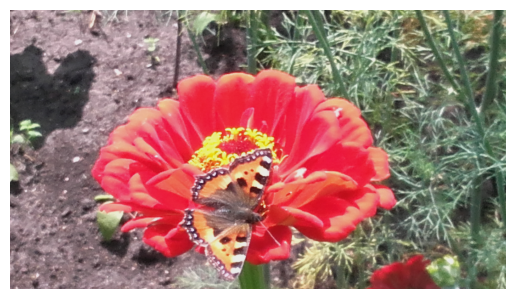

In [3]:
image1 = mpimg.imread('../Sourse_Images/butterfly_on_a_flower.jpg')
plt.imshow(image1)
plt.axis('off')  # скрыть оси
plt.show()

In [4]:
type(image1)

numpy.ndarray

In [5]:
print(f"Размер: {image1.shape}")
print(f"Тип данных: {image1.dtype}")

Размер: (1836, 3264, 3)
Тип данных: uint8


# 1. Фильтры

## 1.1 Медианный фильтр

In [6]:
image = image1
H = image.shape[0]
W = image.shape[1]
C = image.shape[2]

edge = 100

#kernel = np.zeros((filtersize, filtersize))
buf_image = np.zeros((H + 2*edge, W + 2*edge, C), dtype=image.dtype) #np.uint8



In [7]:
print(image.shape)
print(buf_image.shape)
print((buf_image[edge: H+edge,edge: W+edge,:]).shape)

(1836, 3264, 3)
(2036, 3464, 3)
(1836, 3264, 3)


In [8]:
buf_image[edge: H+edge,edge: W+edge,:] = image.copy()

res_image = buf_image

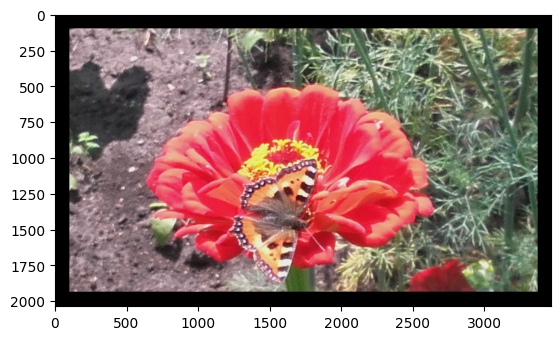

In [9]:
plt.imshow(res_image)

In [10]:
filtersize = 7
edge = (filtersize - 1) // 2
edge

3

In [44]:
def Median_filter(image: np.ndarray, filtersize: int = 3) -> np.ndarray:
    H = image.shape[0]
    W = image.shape[1]
    C = image.shape[2]
    edge = 1
    if (filtersize % 2 and filtersize > 0):
        edge = (filtersize - 1) // 2
    else:
        ####Error
        raise ValueError("Размер ядра должен быть нечетным числом")
        #res_image = np.zeros((H, W, C))
    
    kernel = np.zeros((filtersize, filtersize))
    buf_image = np.zeros((H + 2*edge, W + 2*edge, C), dtype=image.dtype) #np.uint8

    buf_image[edge: H+edge,edge: W+edge,:] = image.copy()

    res_image = np.zeros((H, W, C)) # dtype=image.dtype)
    for k in range(C):
        for i in range(H):
            for j in range(W):
                
                value_array = np.zeros(filtersize*filtersize)
                for il in range(edge):
                    for jl in range(edge):
                        for pos in range(len(value_array)):
                            if (buf_image[i-1+il][j-1+jl][k] < value_array[il+filtersize*jl]):
                                np.insert(value_array, pos, buf_image[i-1+il][j-1+jl][k])
                                break

                value = value_array[len(value_array)//2+1]
                res_image[i][j][k] = value
    return res_image.astype(np.uint8)


In [ ]:
#res_image = buf_image

In [46]:
rng = np.random.default_rng(seed=42)# Создаем генератор случайных чисел
test_arr = rng.integers(0, 255, size=(3, 3, 1))
print(test_arr.squeeze())
print()
arr_med = Median_filter(test_arr)
print(arr_med.squeeze())

[[ 22 197 166]
 [111 110 218]
 [ 21 177  51]]

[[0 0 0]
 [0 0 0]
 [0 0 0]]


In [18]:
image2 = Median_filter(image1)

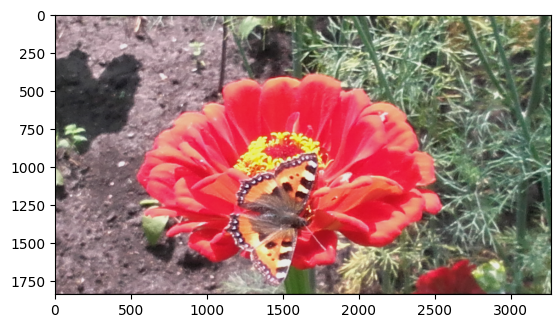

In [19]:
plt.imshow(image2)

[[ 22 197 166]
 [111 110 218]
 [ 21 177  51]]

[[  0   0   0   0   0]
 [  0  22 197 166   0]
 [  0 111 110 218   0]
 [  0  21 177  51   0]
 [  0   0   0   0   0]]


[[ 22 197 166]
 [111 110 218]
 [ 21 177  51]]


[[  0   0   0   0   0]
 [  0  22 197 166   0]
 [  0 111 110 218   0]
 [  0  21 177  51   0]
 [  0   0   0   0   0]]


In [20]:
filtered_image = cv2.medianBlur(image1, 3)

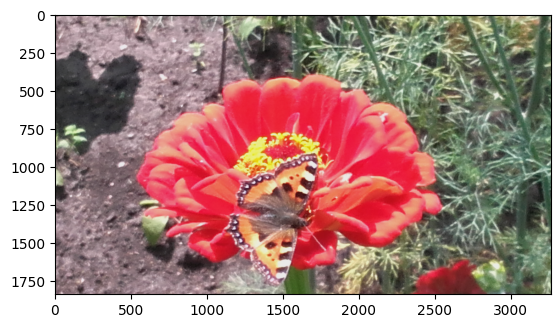

In [21]:
plt.imshow(filtered_image)

In [22]:
def subtract_and_sum(array1, array2):
    if array1.shape != array2.shape:
        raise ValueError(f"Массивы должны иметь одинаковую форму. array1.shape={array1.shape}, array2.shape={array2.shape}")

    result_array = array1 - array2

    total_sum = np.sum(result_array)
    
    return result_array, total_sum

In [24]:
filtered_image.shape

(1836, 3264, 3)

In [25]:
image2.shape

(1838, 3266, 3)

In [23]:
result, total = subtract_and_sum(filtered_image, image2)
print(f"Результат вычитания:\n{result}")
print(f"Сумма всех элементов: {total}")

ValueError: Массивы должны иметь одинаковую форму. array1.shape=(1836, 3264, 3), array2.shape=(1838, 3266, 3)

In [ ]:
plt.imshow(result)

In [49]:
image1.shape

(1836, 3264, 3)

In [ ]:
  """
    for k in range(C):
            for i in range(W):
                for j in range(H):                               
                    res_image[i][j][k] = image[H-1-j][i][k]

    angle = angle % 360
    if(angle == 0):
        res_image = image.copy()
    elif(angle == 90):
        res_image = np.zeros((W, H, C)) 
        for k in range(C):
            for i in range(W):
                for j in range(H):
                    res_image[i][j][k] = image[j][i][k]
    elif(angle == 180):
        res_image = np.zeros((H, W, C)) # dtype=image.dtype)
        for k in range(C):
            for i in range(H):
                for j in range(W):
                    res_image[i][j][k] = image[H-1-i][W-1-j][k]
    elif(angle == 270):
        
        res_image = np.zeros((W, H, C)) # dtype=image.dtype)
        
    else:
        ####Error
        res_image = np.zeros((H, W, C))
    """

In [ ]:
plt.show

Для 1 лаб работы по CV необходимо реализовать базовый минимум операций над изображениями
Входное изображение в формате (RGB, не чёрно-белое)
1. Фильтры

1.1 Медианный фильтр

1.2 Фильтр гаусса
2. Морфологические операции

2.1 Эрозия

2.2 Дилатация

3. Прочие операции

3.1 пороговая бинаризация (для rgb и grayscale изображения)

3.2 выравнивание гистограммы

3.3 поворот изображений на угол кратный 90 градусов


3.3 Поворот изображения на угол кратный 90&deg;

In [30]:
def Rotate(image: np.ndarray, angle: int) -> np.ndarray:
    H = image.shape[0]
    W = image.shape[1]
    C = image.shape[2]
    angle = angle % 360
    if(angle == 0):
        res_image = image.copy()
    elif(angle == 90):
        res_image = np.zeros((W, H, C)) # dtype=image.dtype)
        for k in range(C):
            for i in range(W):
                for j in range(H):
                    res_image[i][j][k] = image[j][i][k]
    elif(angle == 180):
        res_image = np.zeros((H, W, C)) # dtype=image.dtype)
        for k in range(C):
            for i in range(H):
                for j in range(W):
                    res_image[i][j][k] = image[H-1-i][W-1-j][k]
    elif(angle == 270):
        
        res_image = np.zeros((W, H, C)) # dtype=image.dtype)
        for k in range(C):
            for i in range(W):
                for j in range(H):                               
                    res_image[i][j][k] = image[H-1-j][i][k]
    else:
        ####Error
        res_image = np.zeros((H, W, C))
    
    return res_image.astype(np.uint8)


In [26]:
image2 = Rotate(image1, 180)

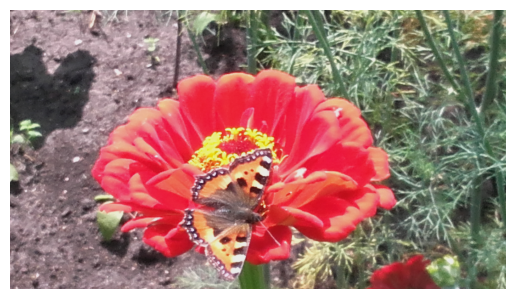

In [29]:
plt.imshow(image1) #plt.imshow(image1)
#plt.imshow(image2) #plt.imshow(image1)
plt.axis('off')  # скрыть оси
plt.show()

In [31]:
rotated_image = []
for i in [0, 90, 180, 270]:
    rotated_image.append(Rotate(image1, i))

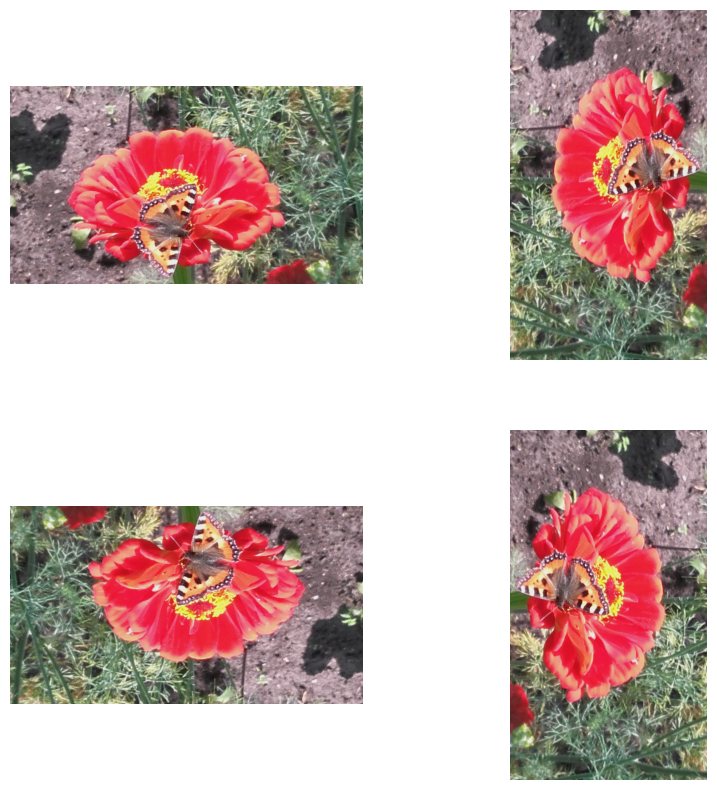

In [40]:
H = 2
W = 2
fig, ax = plt.subplots(H, W, figsize=(10,10))
for i in range(H*W):
    h = i // H
    w = i % W
    ax[h, w].imshow(rotated_image[i])
    ax[h, w].axis('off')
plt.show()

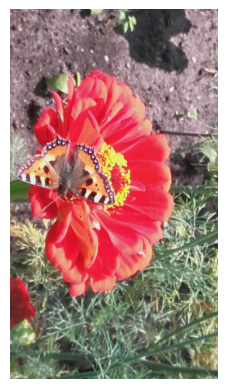

In [12]:
plt.imshow(img2)
plt.axis('off')  # скрыть оси
plt.show()

357

In [ ]:
#cv2.imwrite('output.jpg', image)